# Ok Lets import the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import itertools

import the data

In [ ]:
data = pd.read_csv("/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Lets cleanup the data.

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
outcome,0


In [ ]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
outcome,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df.duplicated().sum()

np.int64(0)

Great no duplicate data. Lets plot the data and see.

Lets see if we have any corrolations

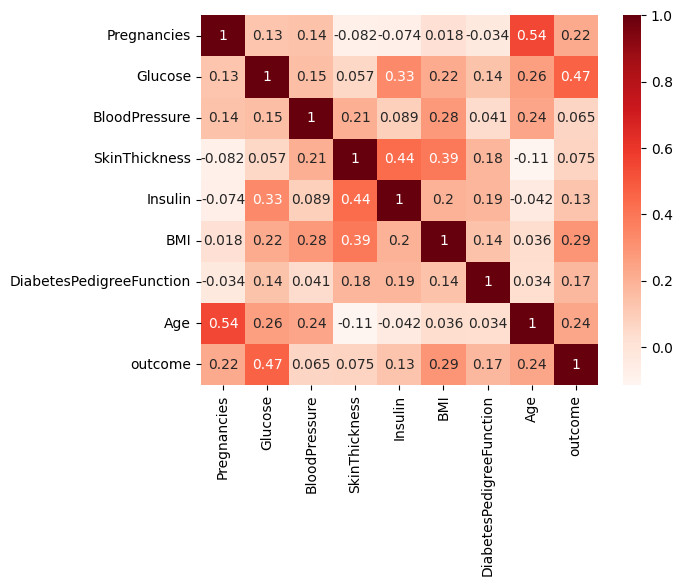

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='Reds')
plt.show()

Ok so the outcome being the Y we can see there are several corrolation facrtors

Lets plot the data and see



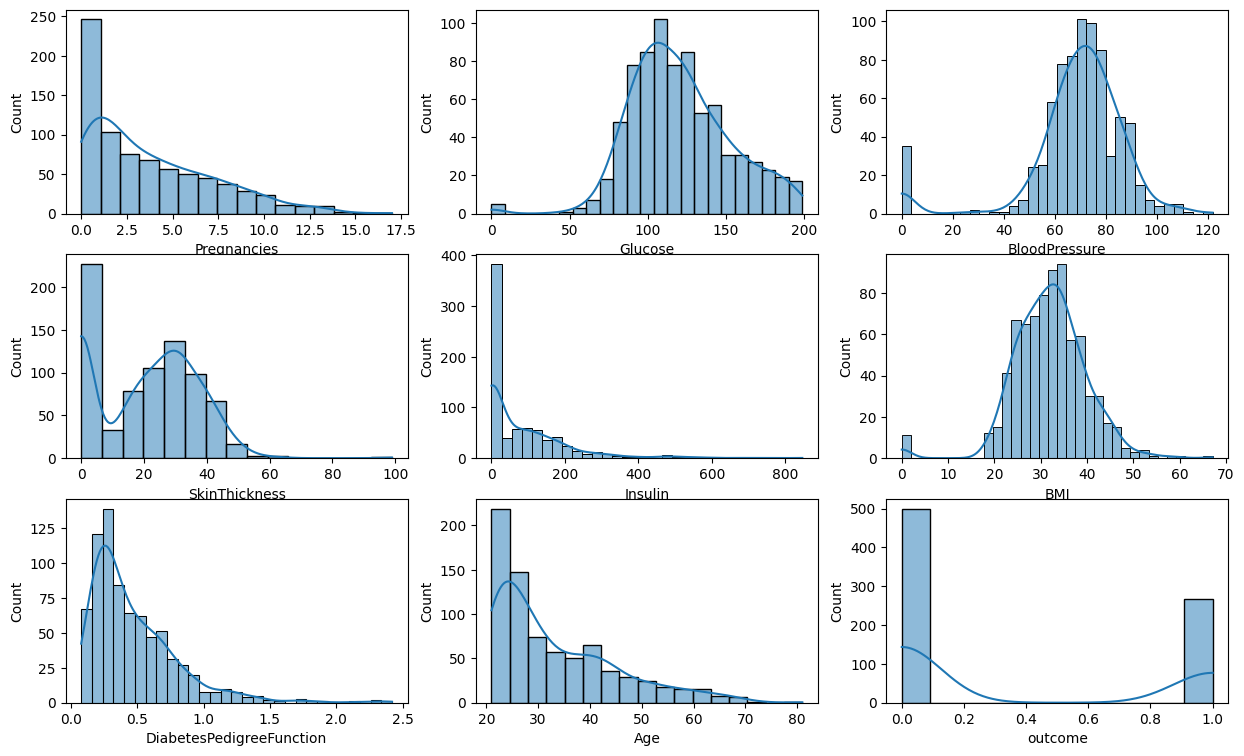

In [ ]:
fig, ax = plt.subplots(3,3,figsize=(15,9))
for i, col in enumerate(df):
    sns.histplot(df[col], kde=True, ax=ax[i//3, i%3])
    # plt.title(f"{col} ditribution", fontsize=14, fontweight='bold', c='r')
plt.show()

As you can see some of the charts are skewed. Lets fix that

In [ ]:
df1 = df.copy()
zero_col = ['Glucose','Insulin','SkinThickness','BloodPressure','BMI']
df1[zero_col] = df1[zero_col].replace(0, np.nan)

for col in ['Glucose','Insulin','SkinThickness']:
    median_col = np.median(df1[df1[col].notna()][col])
    df1[col] = df1[col].fillna(median_col)
for col in ['BMI','BloodPressure']:
    mean_col = np.mean(df1[df1[col].notna()][col])
    df1[col] = df1[col].fillna(mean_col)

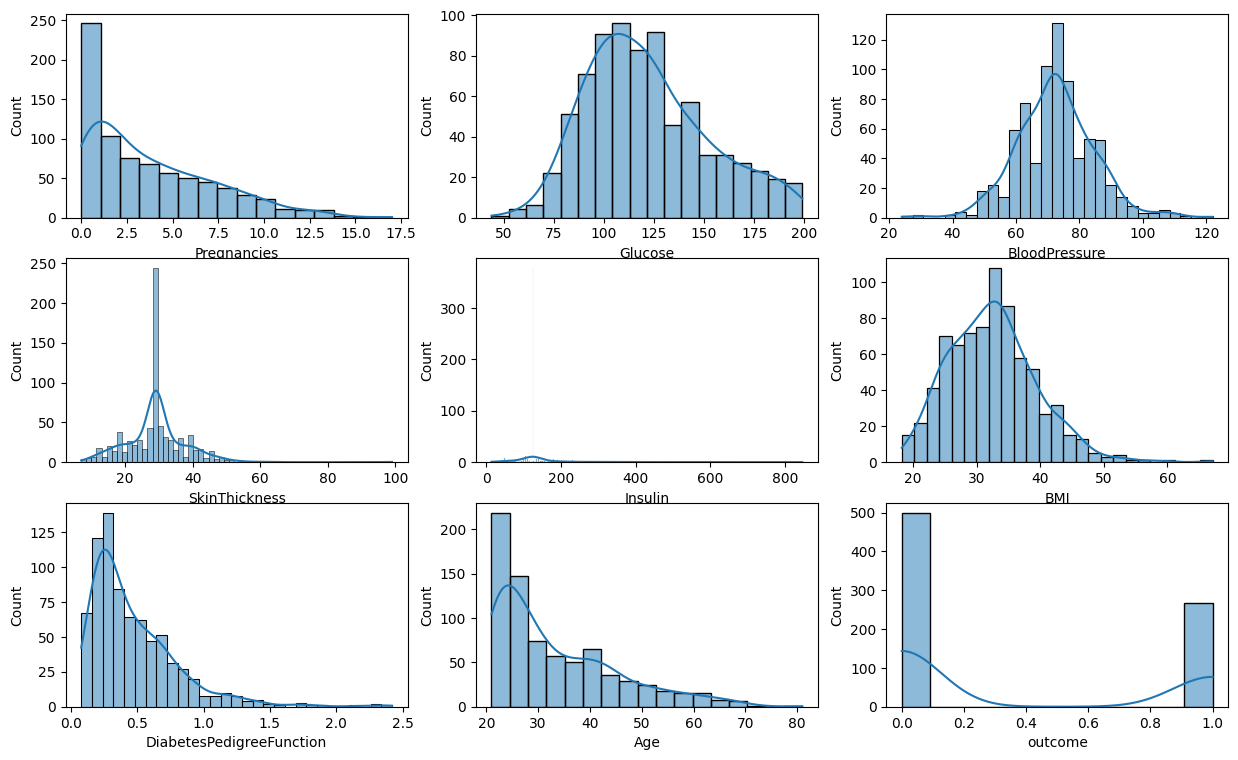

In [ ]:
fig, ax = plt.subplots(3,3,figsize=(15,9))
for i, col in enumerate(df):
    sns.histplot(df1[col], kde=True, ax=ax[i//3, i%3])
    # plt.title(f"{col} ditribution", fontsize=14, fontweight='bold', c='r')
plt.show()

Ok lets do some EDA

In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


Pair Plots

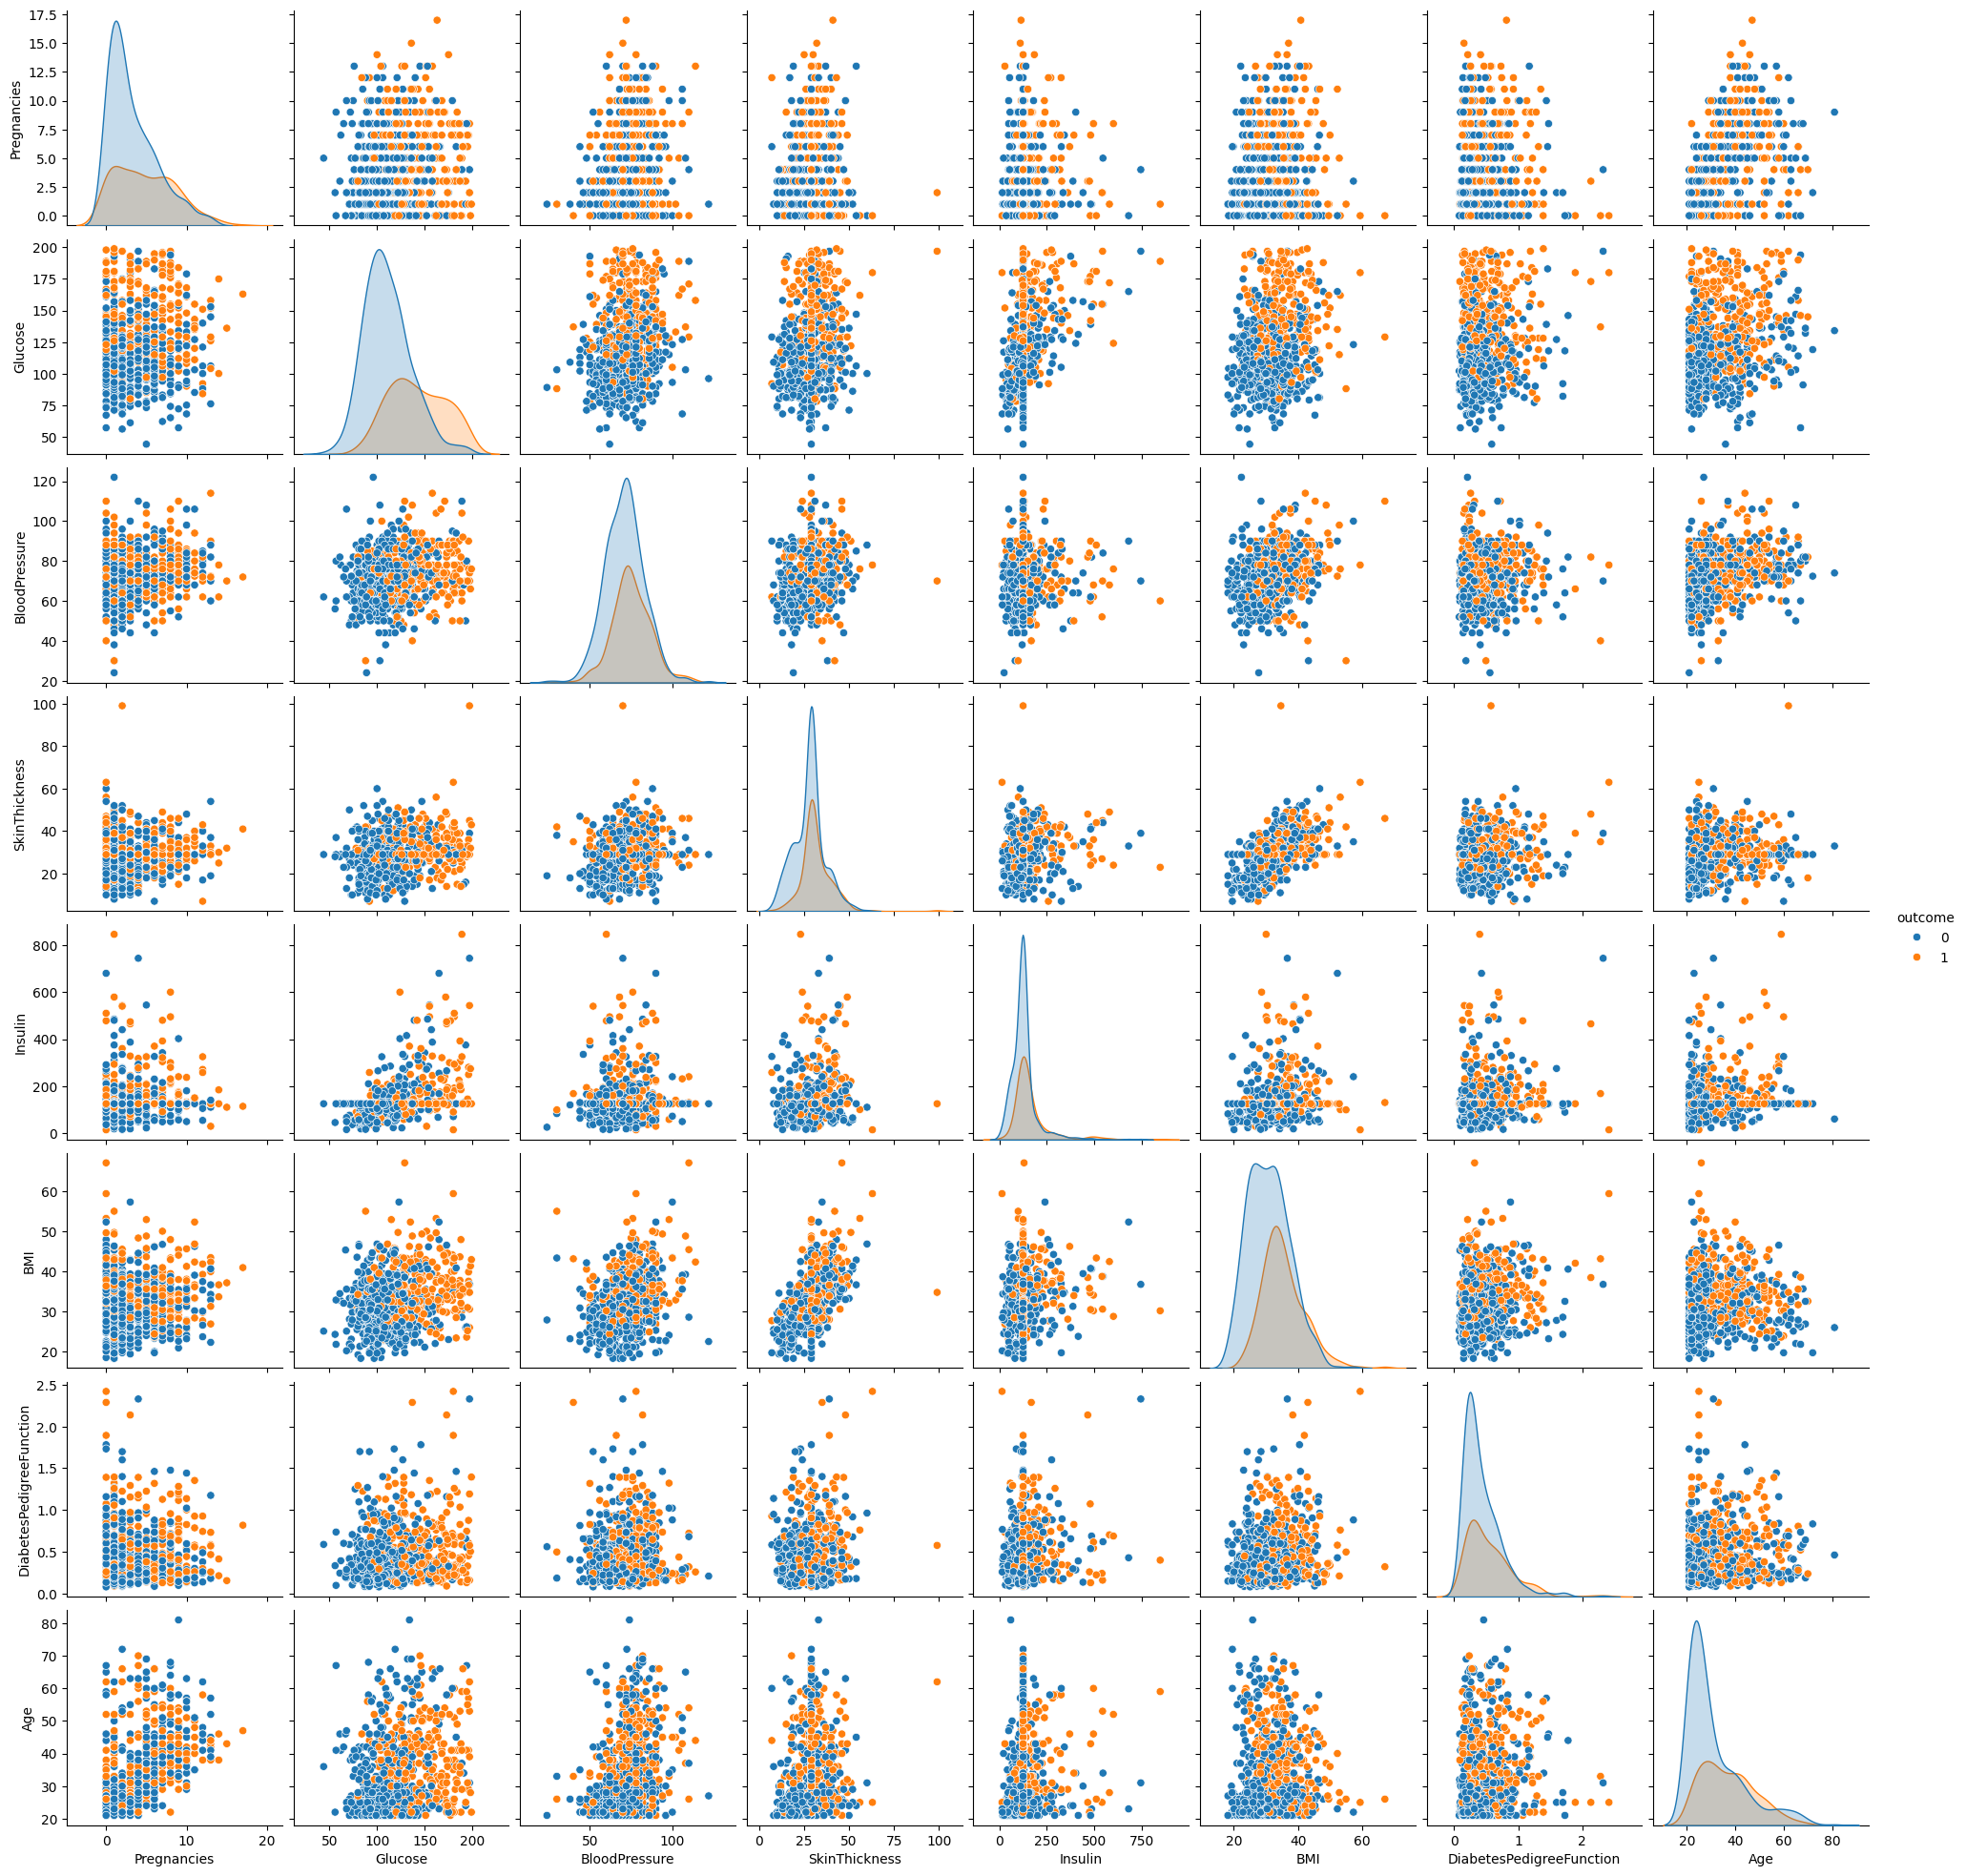

In [ ]:
sns.pairplot(data=df1, diag_kind='kde', hue='outcome')
plt.show()

In [ ]:
fig = go.Figure()
my_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness',
           'Insulin','BMI','DiabetesPedigreeFunction','Age']
for col in my_cols:
    fig.add_trace(go.Box(y=df1[col], name=f'{col}'))
fig.show()

Ok lets build a model

In [ ]:
df1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


X an Y

In [ ]:
x = df1.drop('outcome', axis=1)
y = df1.outcome

Lets import all the ML libs

In [ ]:
from sklearn.model_selection import train_test_split , GridSearchCV, KFold, cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

Scale the data and covert to a df

In [ ]:
scaler = StandardScaler()
x_norm = scaler.fit_transform(x)
x_norm

array([[ 0.63994726,  0.86604475, -0.03351824, ...,  0.16629174,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.52985903, ..., -0.85253118,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69530596, ..., -1.33283341,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03351824, ..., -0.91074963,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02619983, ..., -0.34311972,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19896517, ..., -0.29945588,
        -0.47378505, -0.87137393]])

In [ ]:
x = pd.DataFrame(x_norm, index=x.index, columns=x.columns)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.033518,0.670643,-0.181541,0.166292,0.468492,1.425995
1,-0.844885,-1.205066,-0.529859,-0.012301,-0.181541,-0.852531,-0.365061,-0.190672
2,1.233880,2.016662,-0.695306,-0.012301,-0.181541,-1.332833,0.604397,-0.105584
3,-0.844885,-1.073567,-0.529859,-0.695245,-0.540642,-0.634212,-0.920763,-1.041549
4,-1.141852,0.504422,-2.680669,0.670643,0.316566,1.548980,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.679069,0.297376,2.150354,0.455573,0.064409,-0.908682,2.532136
764,-0.547919,0.011301,-0.198965,-0.239949,-0.181541,0.632039,-0.398282,-0.531023
765,0.342981,-0.021574,-0.033518,-0.695245,-0.332132,-0.910750,-0.685193,-0.275760
766,-0.844885,0.142800,-1.026200,-0.012301,-0.181541,-0.343120,-0.371101,1.170732


Split train test data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
FPR1 = []
TPR1 = []
FPR0 = []
TPR0 = []
ACC = []
Recall = []
Precision = []
F1 = []

def plot_confusion_matrix2(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
        cm(array): confusion matrix
        classes(dictionary): classes in our target
    """
    plt.figure(figsize=(10,7))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt ='d'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

# --------------------------------------------------------------------------------------

def Perform_cross_val(model, k, x, y, scoring):
    """
    perform cross validation
        model: logistic model
        k(scaler): the value for n_splits in KFold()
        x(DataFrame or array):  x_train
        y(DataFrame or array): y_train
        scoring(string): an approach for evaluation in cross validation
    """

    kf = KFold(n_splits=k)
    cv_results = cross_val_score(model, x, y, cv=kf, scoring=scoring)
    cv_mean = np.mean(cv_results)
    print('-'*20, f"CV for k={k}, scoring={scoring}", '-'*20)
    print(f"CV mean: {cv_mean}")
    print(f"CV results: {cv_results}\n")

# --------------------------------------------------------------------------------------

def find_fold_index(k, x):
    """
    Find fold index in kfold
        k(scaler): the value used for n_splits in KFold()
        x(DataFrame or array): x_train
    """

    my_fold_index = []
    j=1
    for _ , test in KFold(k).split(x):

        my_fold_index = []
        for i in test:
            my_fold_index.append(i)
        print(f"fold {j}: [{my_fold_index[0]},{my_fold_index[-1]}]")
        print(20*'-')
        j += 1

# --------------------------------------------------------------------------------------

def features_importance(model, x_test):
    """
    print feature weights and show imporance of each feature
        model: logistic regression
        x_test(Dataframe)
    """
    print('-'*20 , 'Feature', '-'*20)
    coeff = list(model.coef_[0])
    labels = list(x_test.columns)
    features = pd.DataFrame()
    features['Features'] = labels + ['Intercept']
    features['Importance'] = coeff + [model.intercept_[0]]
    features.sort_values(by=['Importance'], ascending=True, inplace=True)
    features['Positive'] = features['Importance'] > 0
    features.set_index('Features', inplace=True)
    features.Importance.plot(kind='barh', figsize=(5,3),
                             color=features.Positive.map({True:'green', False:'orange'}))
    plt.xlabel('Importance')
    plt.show()
    return features

# --------------------------------------------------------------------------------------

def plot_results(FPR0, TPR0, FPR1, TPR1, ACC, Recall, Precision, F1):
    """
    draw ROC curve and plot of Recall, precision, f1 score etc.
        FPR0(list): list of False Positive Rate for class 0
        TPR0(list): list of True Positive Rate for class 0
        FPR1(list): list of Flase Positive Rate for class 1
        TPR1(list): list of True Positive Rate for class 1
        ACC(list): list of accuracy of models
        Recall(list): list of recall score of models
        Precision(list): list of Precision score of models
        F1(list): list of F1 score of models
    """
    fig, ax = plt.subplots(1,3,figsize=(15,4))
    # plot model evaluation
    ax[0].set_title('Model Evaluation Results', fontsize=14, fontweight='bold')
    sns.lineplot(data=pd.DataFrame({'accoracy': ACC, 'Recall': Recall,
                                    'Precision': Precision, 'F1 score': F1}),
                                    markers=True, ax=ax[0])
    ax[0].set_xlabel('M')
    ax[0].set_ylabel('Evaluation')
    ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True)

    # plot ROC curve for class 1
    i=1
    ax[1].set_title('ROC Curve of Class 1', fontsize=14, fontweight='bold')
    for fpr , tpr in zip(FPR1, TPR1):
        ax[1].plot(fpr, tpr, label=f"ROC curve of model{i} (AUC = {round(metrics.auc(fpr, tpr),3)})")
        i += 1
        ax[1].set_xlabel('FPR')
        ax[1].set_ylabel('TPR')
    ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True)

    # plot ROC curve for class zero
    i=1
    ax[2].set_title('ROC Curve of Class 0', fontsize=14, fontweight='bold')
    for fpr , tpr in zip(FPR0, TPR0):
        ax[2].plot(fpr, tpr, '--', label=f"ROC curve of model{i} (AUC = {round(metrics.auc(fpr, tpr),3)})")
        i += 1
        ax[2].set_xlabel('FPR')
        ax[2].set_ylabel('TPR')
    ax[2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
        fancybox=True, shadow=True)

    plt.show()

# --------------------------------------------------------------------------------------

def modeling(x, y, test_size, classes, parameters, is_add=1 ):

    # split data to train and test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)

    # define model and fit model
    logreg = LogisticRegression(solver=parameters['solver'], penalty=parameters['penalty'],
                                C=parameters['C'], n_jobs=-1)
    logreg.fit(x_train, y_train)

    # prediction and results
    y_pred = logreg.predict(x_test)
    y_pred_proba = logreg.predict_proba(x_test)
    cm = confusion_matrix(y_test, y_pred, labels=[1,0])
    fpr1, tpr1, _ = metrics.roc_curve(y_test, y_pred_proba[:,1])
    fpr0, tpr0, _ = metrics.roc_curve(y_test, y_pred_proba[:,0])
    acc = metrics.accuracy_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    pre = metrics.precision_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    # append results
    if is_add == 1:
        FPR0.append(fpr0)
        TPR0.append(tpr0)
        FPR1.append(fpr1)
        TPR1.append(tpr1)
        ACC.append(acc)
        Recall.append(rec)
        Precision.append(pre)
        F1.append(f1)

    plot_results(FPR0, TPR0, FPR1, TPR1, ACC, Recall, Precision, F1)

    # Evaluation model
    print('-'*20 , 'Confusion Matrix', '-'*20)
    print(cm)
    plot_confusion_matrix2(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)
    # or use plot_confusion_matrix from sklearn.metrics
    print('-'*20 , 'Classification Report', '-'*20)
    print(classification_report(y_test, y_pred, target_names=classes), '\n')
    print(f"Jaccard Score: {metrics.jaccard_score(y_test, y_pred)}", '\n')

    # print other result about weight and predicted data
    return logreg, acc, features_importance(logreg, x_test)

In [ ]:
# define model
logreg = LogisticRegression(solver='liblinear')

# check cross validation
cross5_acc = Perform_cross_val(logreg, 5, x_train, y_train, 'accuracy')
cross10_acc = Perform_cross_val(logreg, 10, x_train, y_train, 'accuracy')

-------------------- CV for k=5, scoring=accuracy --------------------
CV mean: 0.7622417699586832
CV results: [0.71544715 0.82113821 0.73170732 0.76422764 0.77868852]

-------------------- CV for k=10, scoring=accuracy --------------------
CV mean: 0.7539925965097832
CV results: [0.74193548 0.67741935 0.87096774 0.77419355 0.72131148 0.72131148
 0.78688525 0.70491803 0.7704918  0.7704918 ]



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.



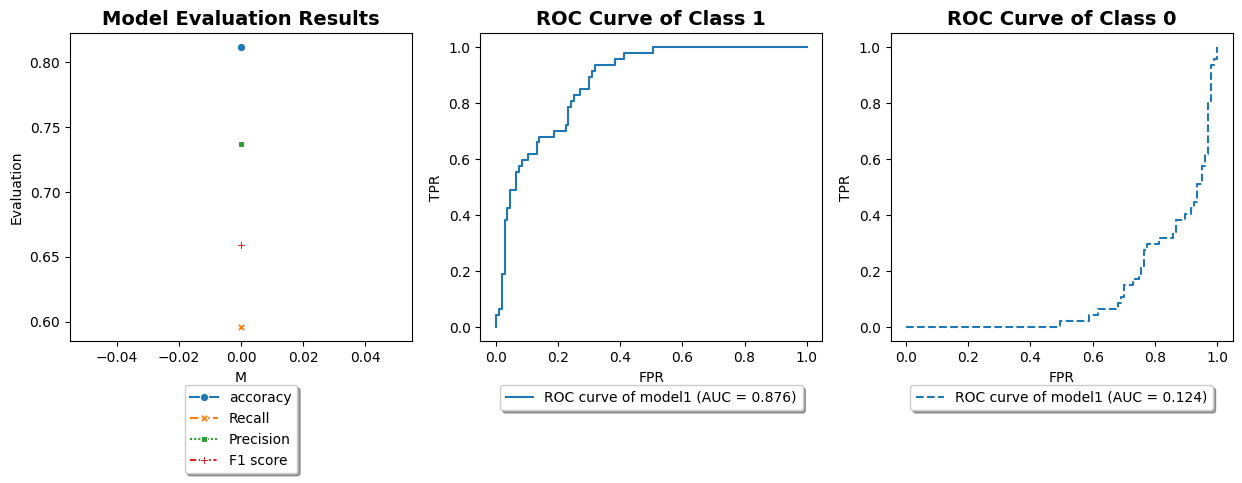

-------------------- Confusion Matrix --------------------
[[28 19]
 [10 97]]


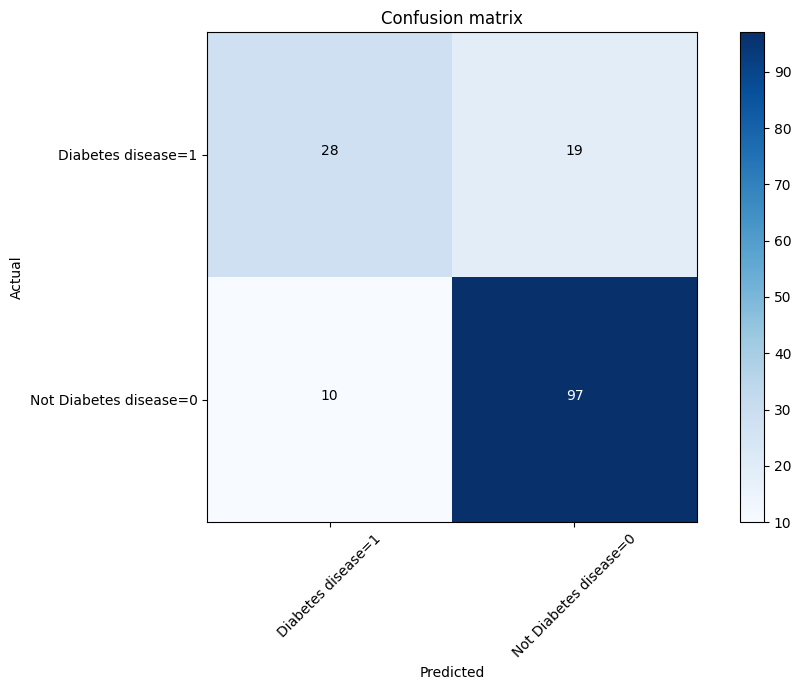

-------------------- Classification Report --------------------
                        precision    recall  f1-score   support

    Diabetes disease=1       0.84      0.91      0.87       107
Not Diabetes disease=0       0.74      0.60      0.66        47

              accuracy                           0.81       154
             macro avg       0.79      0.75      0.76       154
          weighted avg       0.81      0.81      0.81       154
 

Jaccard Score: 0.49122807017543857 

-------------------- Feature --------------------


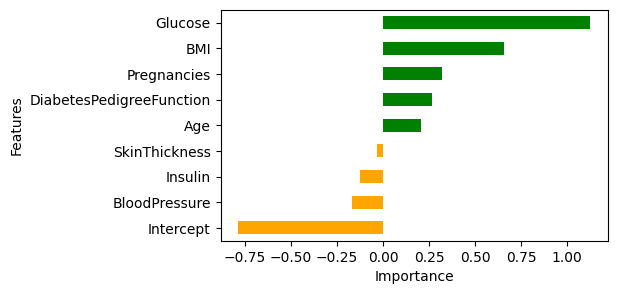

,Importance,Positive
Features,,
Intercept,-0.786687,False
BloodPressure,-0.168136,False
Insulin,-0.124854,False
SkinThickness,-0.032333,False
Age,0.208669,True
DiabetesPedigreeFunction,0.265662,True
Pregnancies,0.321907,True
BMI,0.656904,True
Glucose,1.125913,True


In [ ]:
parameters = dict(solver='liblinear' ,penalty='l2',C=1)
model, acc, features = modeling(x, y, 0.2, ['Diabetes disease=1', 'Not Diabetes disease=0'], parameters, is_add=1)
features

Ok the model performs good. It can be further improved by diffrenet models and feature engineering. We can clearly see the importance values based on what model have predited. And it intuitively maked sense.

Ok lets improve this model

In [ ]:
# we improve model by ذringing some features to the power of 3
# we have negative number so we can not use dim=2
dim = 3
for col in features.index.tolist()[1:]:
    new_col = f"{col}_{dim}"
    x[new_col] = x[col] ** dim
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    logreg = LogisticRegression(solver='liblinear')
    logreg.fit(x_train, y_train)
    accuracy = metrics.accuracy_score(y_test, logreg.predict(x_test))
    if accuracy <= acc:
        x.drop(new_col, axis=1, inplace=True)
    else:
        acc = accuracy
        parameters = dict(solver='liblinear' ,penalty='l2',C=1)
        modeling(x, y, 0.2, ['Diabetes disease=1', 'Not Diabetes disease=0'], parameters, is_add=1)

In [ ]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.033518,0.670643,-0.181541,0.166292,0.468492,1.425995
1,-0.844885,-1.205066,-0.529859,-0.012301,-0.181541,-0.852531,-0.365061,-0.190672
2,1.233880,2.016662,-0.695306,-0.012301,-0.181541,-1.332833,0.604397,-0.105584
3,-0.844885,-1.073567,-0.529859,-0.695245,-0.540642,-0.634212,-0.920763,-1.041549
4,-1.141852,0.504422,-2.680669,0.670643,0.316566,1.548980,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.679069,0.297376,2.150354,0.455573,0.064409,-0.908682,2.532136
764,-0.547919,0.011301,-0.198965,-0.239949,-0.181541,0.632039,-0.398282,-0.531023
765,0.342981,-0.021574,-0.033518,-0.695245,-0.332132,-0.910750,-0.685193,-0.275760
766,-0.844885,0.142800,-1.026200,-0.012301,-0.181541,-0.343120,-0.371101,1.170732


Since exponentiation had little impact on performance, we will now focus on tuning the hyperparameters of the logistic regression model to improve its accuracy.

In [ ]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{mean} ({stdev}) with: {param}")

Best: 0.7582707562136436 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.7577868852459015 (0.058276888692476665) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.7577868852459015 (0.058276888692476665) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.7577868852459015 (0.058276888692476665) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.7577868852459015 (0.058276888692476665) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.7577868852459015 (0.058276888692476665) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.7576229508196719 (0.05840218730112301) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.7576229508196719 (0.05840218730112301) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.7577868852459015 (0.058276888692476665) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.7576229508196719 (0.05840218730112301) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.7576229508196719 (0.05840218730112301) with: {'C': 10, '

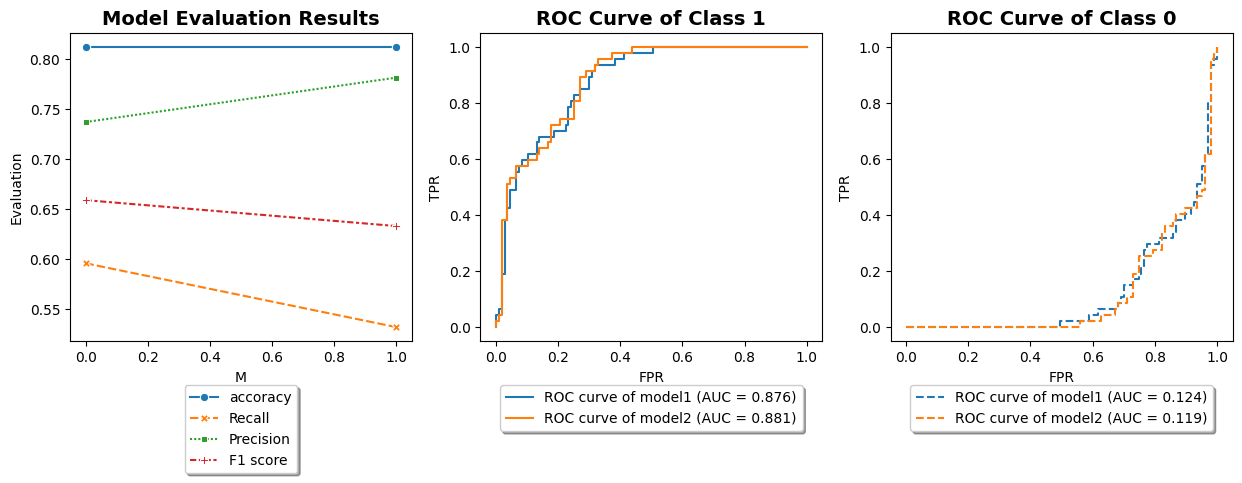

-------------------- Confusion Matrix --------------------
[[ 25  22]
 [  7 100]]


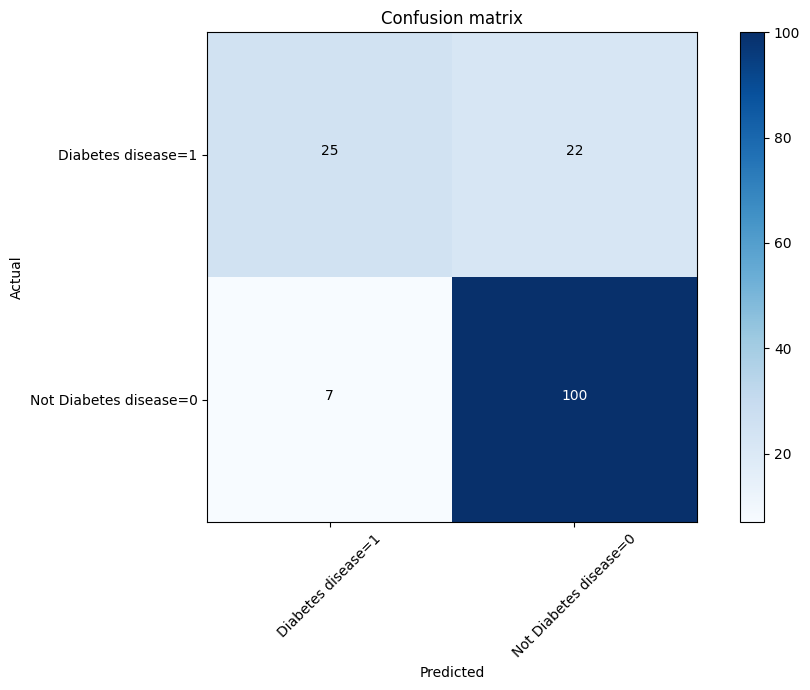

-------------------- Classification Report --------------------
                        precision    recall  f1-score   support

    Diabetes disease=1       0.82      0.93      0.87       107
Not Diabetes disease=0       0.78      0.53      0.63        47

              accuracy                           0.81       154
             macro avg       0.80      0.73      0.75       154
          weighted avg       0.81      0.81      0.80       154
 

Jaccard Score: 0.46296296296296297 

-------------------- Feature --------------------


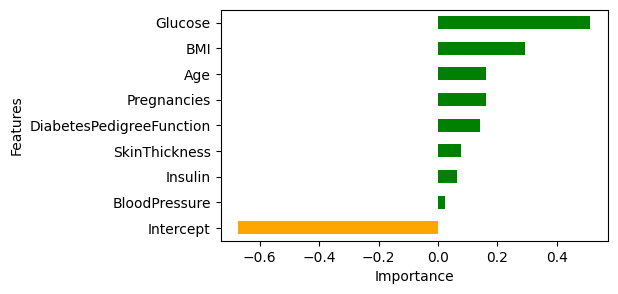

,Importance,Positive
Features,,
Intercept,-0.672717,False
BloodPressure,0.022672,True
Insulin,0.065495,True
SkinThickness,0.078959,True
DiabetesPedigreeFunction,0.143078,True
Pregnancies,0.161962,True
Age,0.162977,True
BMI,0.292520,True
Glucose,0.513303,True


In [ ]:
parameters = dict(grid_result.best_params_)
model, _, features = modeling(x, y, 0.2, ['Diabetes disease=1', 'Not Diabetes disease=0'], parameters, is_add=1)
features

lets improve it further with try  dot product of features


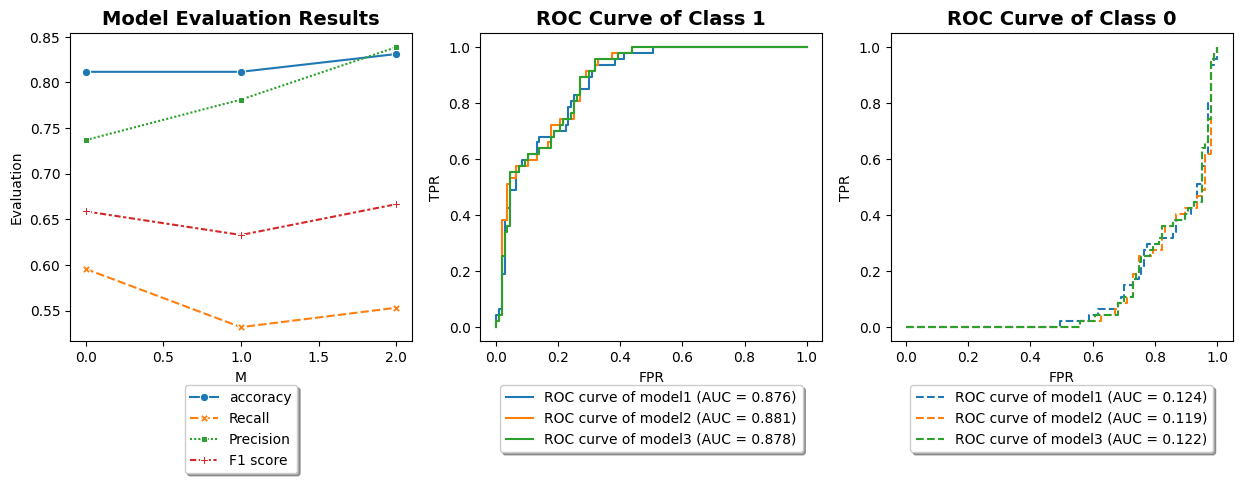

-------------------- Confusion Matrix --------------------
[[ 26  21]
 [  5 102]]


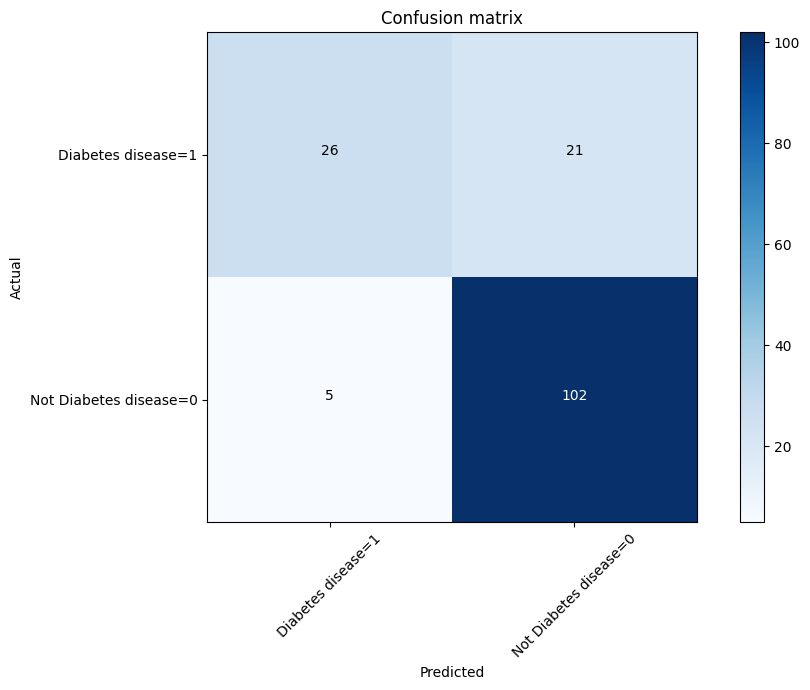

-------------------- Classification Report --------------------
                        precision    recall  f1-score   support

    Diabetes disease=1       0.83      0.95      0.89       107
Not Diabetes disease=0       0.84      0.55      0.67        47

              accuracy                           0.83       154
             macro avg       0.83      0.75      0.78       154
          weighted avg       0.83      0.83      0.82       154
 

Jaccard Score: 0.5 

-------------------- Feature --------------------


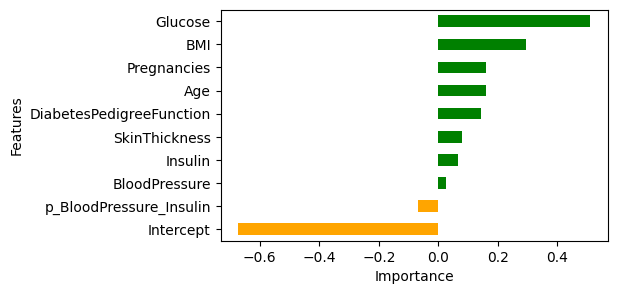

In [ ]:
x['p_BloodPressure_Insulin'] = x.BloodPressure * x.Insulin
model, _, features = modeling(x, y, 0.2, ['Diabetes disease=1', 'Not Diabetes disease=0'], parameters, is_add=1)

Now testing model for test_size =0.3 and 0.25

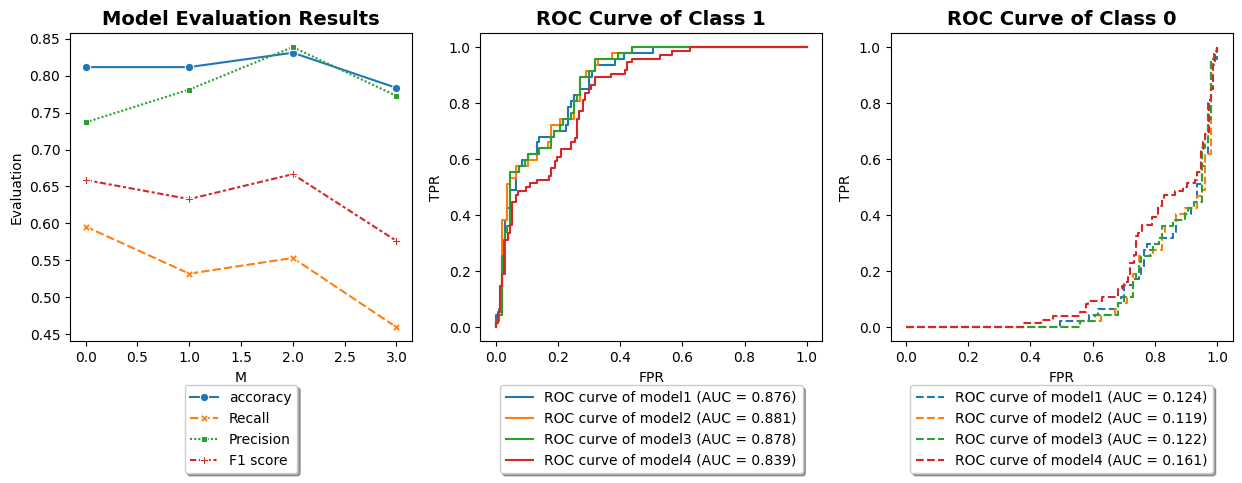

-------------------- Confusion Matrix --------------------
[[ 34  40]
 [ 10 147]]


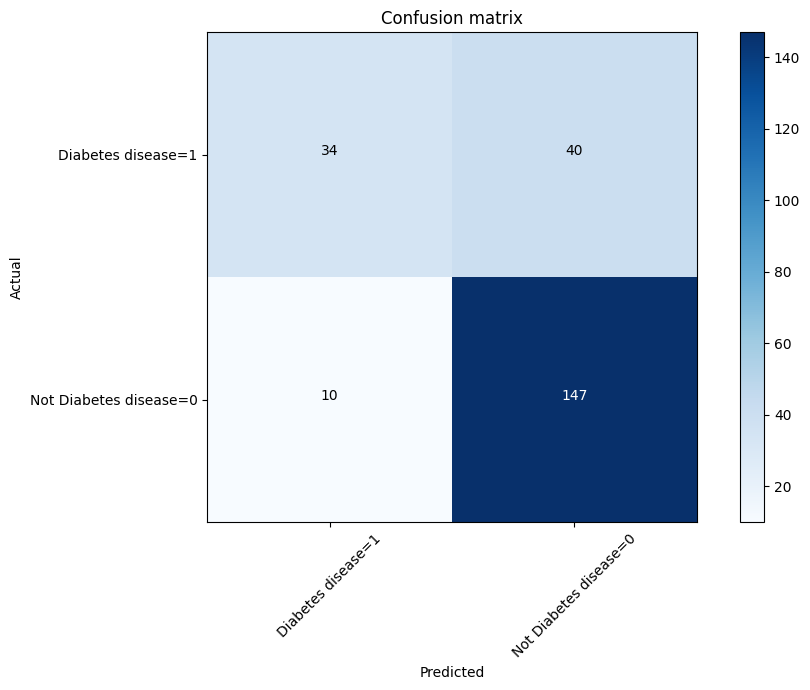

-------------------- Classification Report --------------------
                        precision    recall  f1-score   support

    Diabetes disease=1       0.79      0.94      0.85       157
Not Diabetes disease=0       0.77      0.46      0.58        74

              accuracy                           0.78       231
             macro avg       0.78      0.70      0.72       231
          weighted avg       0.78      0.78      0.77       231
 

Jaccard Score: 0.40476190476190477 

-------------------- Feature --------------------


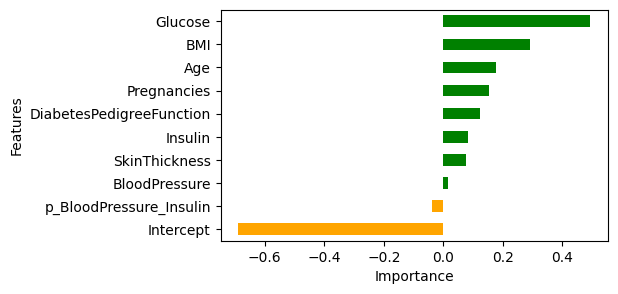

In [ ]:
model, _, features = modeling(x, y, 0.3, ['Diabetes disease=1', 'Not Diabetes disease=0'], parameters, is_add=1)

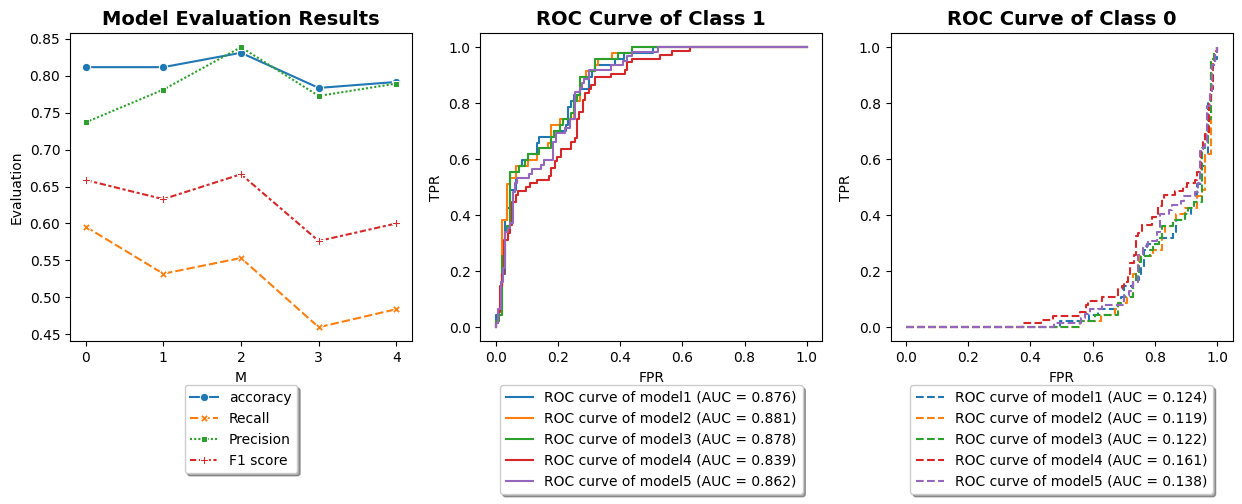

-------------------- Confusion Matrix --------------------
[[ 30  32]
 [  8 122]]


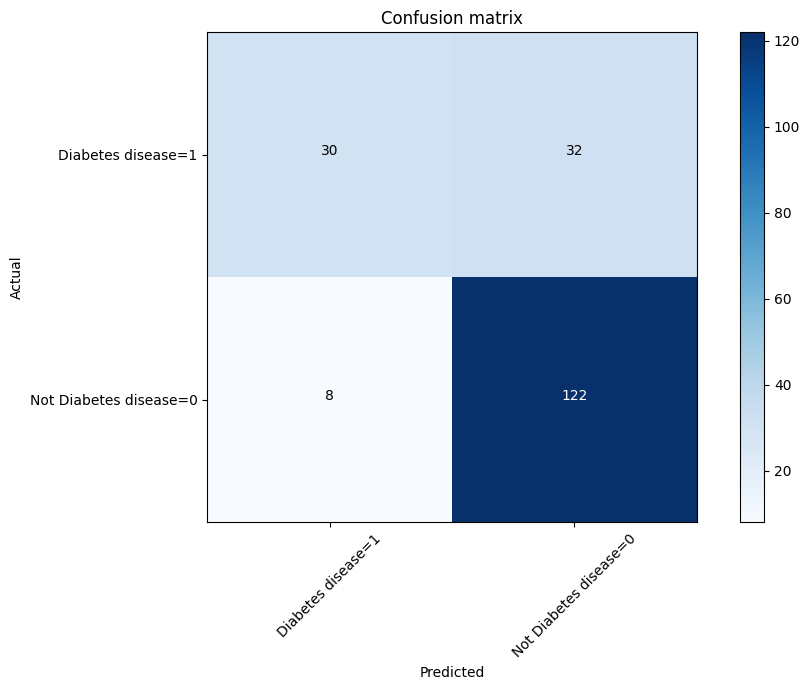

-------------------- Classification Report --------------------
                        precision    recall  f1-score   support

    Diabetes disease=1       0.79      0.94      0.86       130
Not Diabetes disease=0       0.79      0.48      0.60        62

              accuracy                           0.79       192
             macro avg       0.79      0.71      0.73       192
          weighted avg       0.79      0.79      0.78       192
 

Jaccard Score: 0.42857142857142855 

-------------------- Feature --------------------


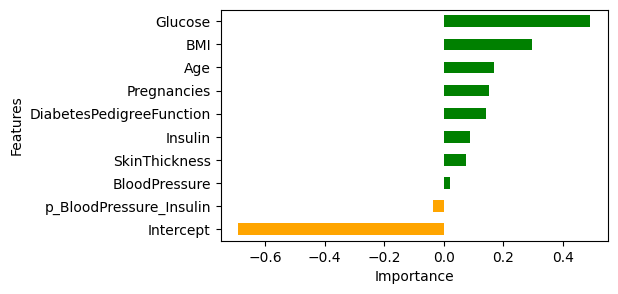

In [ ]:
model, acc, features = modeling(x, y, 0.25, ['Diabetes disease=1', 'Not Diabetes disease=0'], parameters, is_add=1)

As seen, the best model was the one obtained with a test size = 0.2

for prevent repeat model 3 that has better result we
delete model 3 and now fit model again as the final model so:

In [ ]:

del FPR1[2]
del TPR1[2]
del FPR0[2]
del TPR0[2]
del ACC[2]
del Recall[2]
del Precision[2]
del F1[2]

 modeling final model that is better model

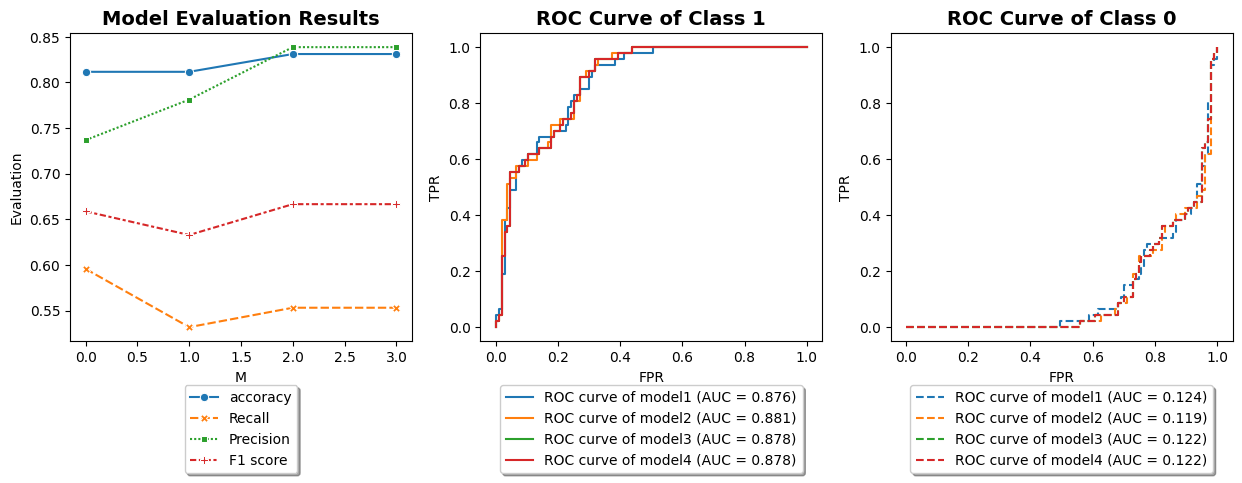

-------------------- Confusion Matrix --------------------
[[ 26  21]
 [  5 102]]


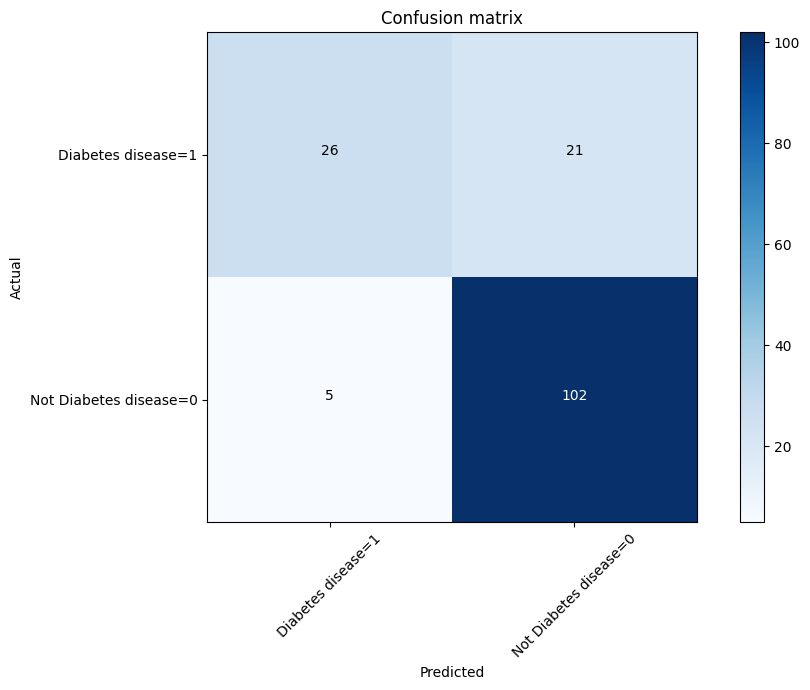

-------------------- Classification Report --------------------
                        precision    recall  f1-score   support

    Diabetes disease=1       0.83      0.95      0.89       107
Not Diabetes disease=0       0.84      0.55      0.67        47

              accuracy                           0.83       154
             macro avg       0.83      0.75      0.78       154
          weighted avg       0.83      0.83      0.82       154
 

Jaccard Score: 0.5 

-------------------- Feature --------------------


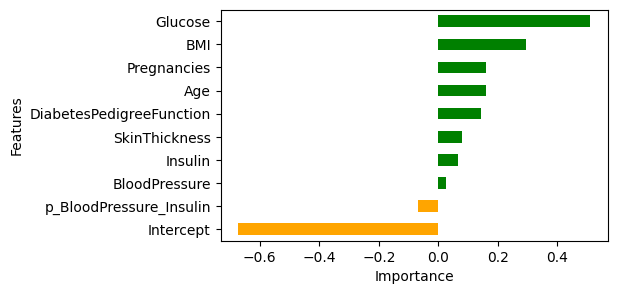

,Importance,Positive
Features,,
Intercept,-0.672501,False
p_BloodPressure_Insulin,-0.069038,False
BloodPressure,0.026617,True
Insulin,0.065771,True
SkinThickness,0.080280,True
DiabetesPedigreeFunction,0.144227,True
Age,0.161380,True
Pregnancies,0.161387,True
BMI,0.294559,True


In [ ]:
model, _, features = modeling(x, y, 0.2, ['Diabetes disease=1', 'Not Diabetes disease=0'], parameters, is_add=1)
features

This model is the best model.

# Model Summary
The XGBoost classifier was trained and evaluated on the processed diabetes dataset using an 80/20 train-test split. The model achieved strong classification performance, as indicated by precision, recall, F1-score, and a high AUC value. The confusion matrix and ROC curve confirmed the model's ability to distinguish between diabetic and non-diabetic cases effectively. These results suggest that the model is well-suited for predictive analysis in medical datasets, particularly for early detection of diabetes. The final trained model has been saved for deployment or further testing.